# Import libraries

In [376]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Redbull palette

In [406]:
redbull_colors = ['#00174C', '#FF004C', '#FFCC00', '#CCCCCC', '#003773']
redbull_palette = sns.color_palette(redbull_colors)
redbull_palette

[(0.0, 0.09019607843137255, 0.2980392156862745),
 (1.0, 0.0, 0.2980392156862745),
 (1.0, 0.8, 0.0),
 (0.8, 0.8, 0.8),
 (0.0, 0.21568627450980393, 0.45098039215686275)]

# Global vars

In [275]:
# path where the csv files are saved
DATA_FOLDER = '/Users/luisalcala/Desktop/redbull/data'
N_TEAMS_SEASON = 18

# EDA Standings

## Load clean file

In [276]:
standings_df_clean = pd.read_csv(os.path.join(DATA_FOLDER, 'clean_full_standings.csv'))
standings_df_clean.head()

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id
0,1,Bayern Munich,17,13,2,2,17,13,2,2,34,26,4,4,100,32,68,82,2019
1,2,Borussia Dortmund,17,11,3,3,17,10,3,4,34,21,6,7,84,41,43,69,2019
2,3,RB Leipzig,17,7,8,2,17,11,4,2,34,18,12,4,81,37,44,66,2019
3,4,Borussia Mönchengladbach,17,12,2,3,17,8,3,6,34,20,5,9,66,40,26,65,2019
4,5,Bayer 04 Leverkusen,17,9,4,4,17,10,2,5,34,19,6,9,61,44,17,63,2019


In [277]:
standings_df_clean.dtypes

final_standing     int64
team_name         object
home_played        int64
home_wins          int64
home_draws         int64
home_losses        int64
away_played        int64
away_wins          int64
away_draws         int64
away_losses        int64
total_played       int64
total_wins         int64
total_draws        int64
total_losses       int64
goals_in_favor     int64
goals_against      int64
goals_balance      int64
points             int64
season_id          int64
dtype: object

## Available seasons

In [278]:
print(f"Number of unique seasons: {standings_df_clean['season_id'].nunique()}")
print(f"Available seasons: {standings_df_clean['season_id'].unique()}")

Number of unique seasons: 5
Available seasons: [2019 2020 2021 2022 2023]


In [279]:
unique_seasons = standings_df_clean['season_id'].unique()

## Teams per season

In [280]:
print(f"Total teams: {standings_df_clean['team_name'].nunique()}")
print(f"Distinct teams: {standings_df_clean['team_name'].unique()}")

Total teams: 24
Distinct teams: ['Bayern Munich' 'Borussia Dortmund' 'RB Leipzig'
 'Borussia Mönchengladbach' 'Bayer 04 Leverkusen' '1899 Hoffenheim'
 'VfL Wolfsburg' 'SC Freiburg' 'Eintracht Frankfurt' 'Hertha Berlin'
 'FC Union Berlin' 'FC Schalke 04' 'Mainz 05' 'FC Köln' 'FC Augsburg'
 'Werder Bremen' 'Fortuna Düsseldorf' 'SC Paderborn 07' 'VfB Stuttgart'
 'Arminia Bielefeld' 'VfL Bochum' 'Greuther Fürth' 'FC Heidenheim'
 'Darmstadt 98']


In [281]:
standings_df_clean[standings_df_clean['season_id']==2019]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig',
       'Borussia Mönchengladbach', 'Bayer 04 Leverkusen',
       '1899 Hoffenheim', 'VfL Wolfsburg', 'SC Freiburg',
       'Eintracht Frankfurt', 'Hertha Berlin', 'FC Union Berlin',
       'FC Schalke 04', 'Mainz 05', 'FC Köln', 'FC Augsburg',
       'Werder Bremen', 'Fortuna Düsseldorf', 'SC Paderborn 07'],
      dtype=object)

In [282]:
standings_df_clean[standings_df_clean['season_id']==2020]['team_name'].unique()

array(['Bayern Munich', 'RB Leipzig', 'Borussia Dortmund',
       'VfL Wolfsburg', 'Eintracht Frankfurt', 'Bayer 04 Leverkusen',
       'FC Union Berlin', 'Borussia Mönchengladbach', 'VfB Stuttgart',
       'SC Freiburg', '1899 Hoffenheim', 'Mainz 05', 'FC Augsburg',
       'Hertha Berlin', 'Arminia Bielefeld', 'FC Köln', 'Werder Bremen',
       'FC Schalke 04'], dtype=object)

In [283]:
standings_df_clean[standings_df_clean['season_id']==2021]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'RB Leipzig', 'FC Union Berlin', 'SC Freiburg', 'FC Köln',
       'Mainz 05', '1899 Hoffenheim', 'Borussia Mönchengladbach',
       'Eintracht Frankfurt', 'VfL Wolfsburg', 'VfL Bochum',
       'FC Augsburg', 'VfB Stuttgart', 'Hertha Berlin',
       'Arminia Bielefeld', 'Greuther Fürth'], dtype=object)

In [284]:
standings_df_clean[standings_df_clean['season_id']==2022]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig',
       'FC Union Berlin', 'SC Freiburg', 'Bayer 04 Leverkusen',
       'Eintracht Frankfurt', 'VfL Wolfsburg', 'Mainz 05',
       'Borussia Mönchengladbach', 'FC Köln', '1899 Hoffenheim',
       'Werder Bremen', 'VfL Bochum', 'FC Augsburg', 'VfB Stuttgart',
       'FC Schalke 04', 'Hertha Berlin'], dtype=object)

In [285]:
standings_df_clean[standings_df_clean['season_id']==2023]['team_name'].unique()

array(['Bayer 04 Leverkusen', 'VfB Stuttgart', 'Bayern Munich',
       'RB Leipzig', 'Borussia Dortmund', 'Eintracht Frankfurt',
       '1899 Hoffenheim', 'FC Heidenheim', 'Werder Bremen', 'SC Freiburg',
       'FC Augsburg', 'VfL Wolfsburg', 'Mainz 05',
       'Borussia Mönchengladbach', 'FC Union Berlin', 'VfL Bochum',
       'FC Köln', 'Darmstadt 98'], dtype=object)

In [286]:
unique_teams = standings_df_clean['team_name'].unique()

In [367]:
standings_df_clean[standings_df_clean['team_name']=='RB Leipzig']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id
2,3,RB Leipzig,17,7,8,2,17,11,4,2,34,18,12,4,81,37,44,66,2019
19,2,RB Leipzig,17,11,4,2,17,8,4,5,34,19,8,7,60,32,28,65,2020
39,4,RB Leipzig,17,11,2,4,17,6,5,6,34,17,7,10,72,37,35,58,2021
56,3,RB Leipzig,17,13,2,2,17,7,4,6,34,20,6,8,64,41,23,66,2022
75,4,RB Leipzig,17,11,4,2,17,8,4,5,34,19,8,7,77,39,38,65,2023


## Top 5 each season

In [518]:
for season in unique_seasons:
    print(season)
    print(standings_df_clean[standings_df_clean['season_id']==season][['final_standing', 'team_name']].head(5).values)

2019
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'RB Leipzig']
 [4 'Borussia Mönchengladbach']
 [5 'Bayer 04 Leverkusen']]
2020
[[1 'Bayern Munich']
 [2 'RB Leipzig']
 [3 'Borussia Dortmund']
 [4 'VfL Wolfsburg']
 [5 'Eintracht Frankfurt']]
2021
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'Bayer 04 Leverkusen']
 [4 'RB Leipzig']
 [5 'FC Union Berlin']]
2022
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'RB Leipzig']
 [4 'FC Union Berlin']
 [5 'SC Freiburg']]
2023
[[1 'Bayer 04 Leverkusen']
 [2 'VfB Stuttgart']
 [3 'Bayern Munich']
 [4 'RB Leipzig']
 [5 'Borussia Dortmund']]


## Search specifics

In [526]:
standings_df_clean[standings_df_clean['team_name']=='VfL Wolfsburg']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id
6,7,VfL Wolfsburg,17,4,7,6,17,9,3,5,34,13,10,11,48,46,2,49,2019
21,4,VfL Wolfsburg,17,10,4,3,17,7,6,4,34,17,10,7,61,37,24,61,2020
47,12,VfL Wolfsburg,17,7,3,7,17,5,3,9,34,12,6,16,43,54,-11,42,2021
61,8,VfL Wolfsburg,17,6,7,4,17,7,3,7,34,13,10,11,57,48,9,49,2022
83,12,VfL Wolfsburg,17,6,4,7,17,4,3,10,34,10,7,17,41,56,-15,37,2023


## Total appearances of each team

Total seasons: 5

In [287]:
df_team_count = pd.DataFrame(standings_df_clean['team_name'].value_counts()).reset_index()
df_team_count

,team_name,count
0,Bayern Munich,5
1,SC Freiburg,5
2,FC Augsburg,5
3,FC Köln,5
4,Borussia Dortmund,5
5,FC Union Berlin,5
6,Eintracht Frankfurt,5
7,Mainz 05,5
8,VfL Wolfsburg,5
9,1899 Hoffenheim,5


In [288]:
unique_counts = df_team_count['count'].unique()
value_to_color = {
    value: redbull_colors[i % len(redbull_colors)] for i, value in enumerate(unique_counts)
}
value_to_color

{5: '#00174C', 4: '#FF004C', 3: '#FFCC00', 2: '#CCCCCC', 1: '#003773'}

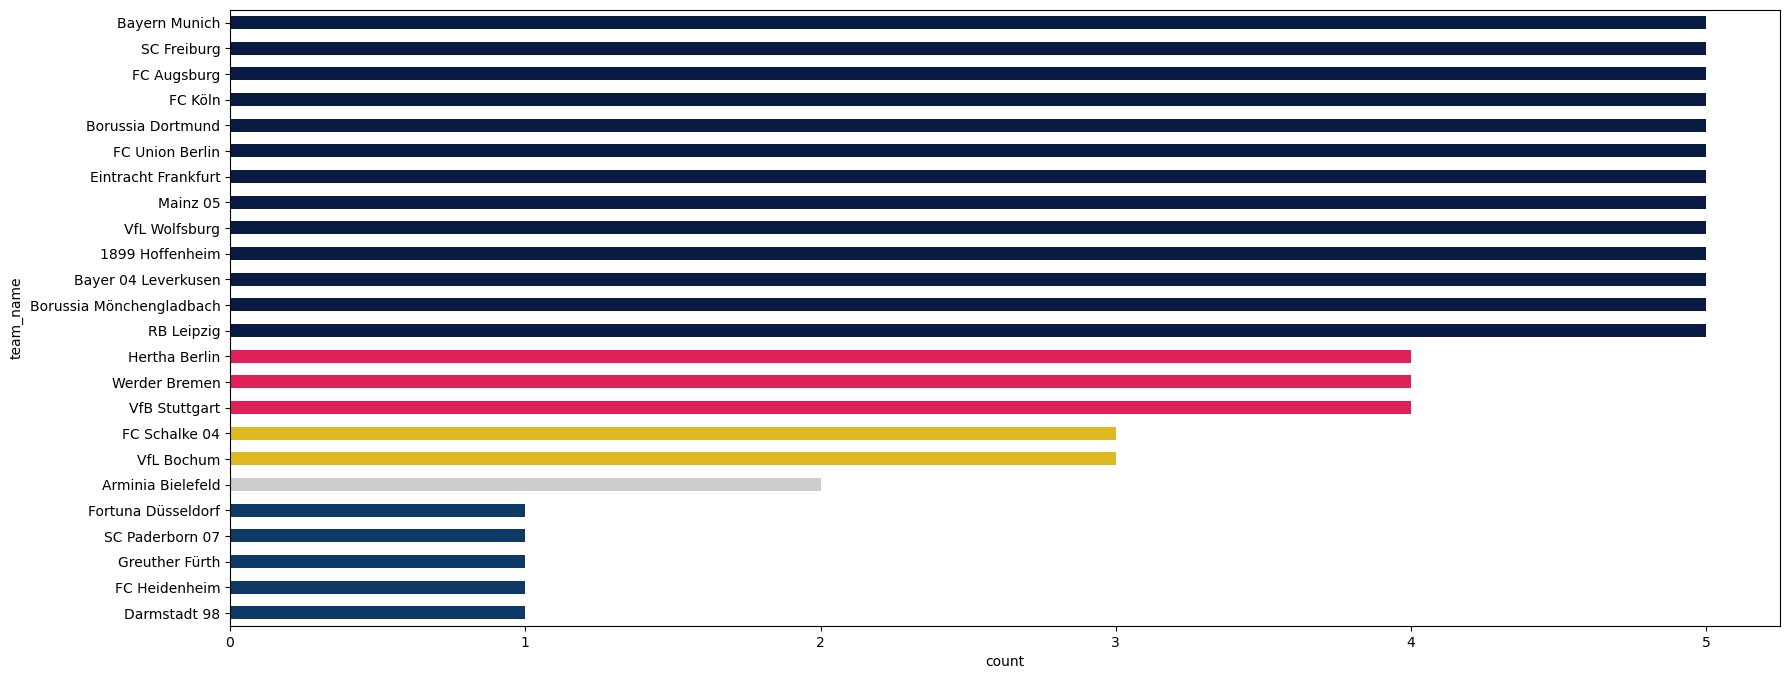

In [289]:
plt.figure(figsize=(20,8))
sns.barplot(
    data=df_team_count,
    x='count', 
    y='team_name', 
    palette=[value_to_color[val] for val in df_team_count['count']],
    saturation=0.75,
    alpha=1,
    fill=True,
    width=0.5
)
#plt.xticks(rotation=90)
plt.show()

## Total times in top 5 and last 5 for each team

In [323]:
d_count_top_5 = {
    team: 0 for team in unique_teams
}

for season in unique_seasons:
    for team in unique_teams:
        first_5 = standings_df_clean[standings_df_clean['season_id'] == season]['team_name'].head(5)
        d_count_top_5[team] += (first_5 == team).sum()
df_top_5 = pd.DataFrame([d_count_top_5]).T.sort_values(by=0, ascending=False).reset_index()
df_top_5.columns = ['team_name', 'n_times_top_5']
df_top_5

,team_name,n_times_top_5
0,Bayern Munich,5
1,RB Leipzig,5
2,Borussia Dortmund,5
3,Bayer 04 Leverkusen,3
4,FC Union Berlin,2
5,VfB Stuttgart,1
6,Borussia Mönchengladbach,1
7,VfL Wolfsburg,1
8,SC Freiburg,1
9,Eintracht Frankfurt,1


In [329]:
best_consistent_5 = list(df_top_5['team_name'][:5].values)
best_consistent_5

['Bayern Munich',
 'RB Leipzig',
 'Borussia Dortmund',
 'Bayer 04 Leverkusen',
 'FC Union Berlin']

In [324]:
d_count_last_5 = {
    team: 0 for team in unique_teams
}

for season in unique_seasons:
    for team in unique_teams:
        last_5 = standings_df_clean[standings_df_clean['season_id'] == season]['team_name'].tail(5)
        d_count_last_5[team] += (last_5 == team).sum()
df_last_5 = pd.DataFrame([d_count_last_5]).T.sort_values(by=0, ascending=False).reset_index()
df_last_5.columns = ['team_name', 'n_times_last_5']
df_last_5

,team_name,n_times_last_5
0,FC Augsburg,3
1,FC Köln,3
2,VfL Bochum,2
3,Werder Bremen,2
4,VfB Stuttgart,2
5,Darmstadt 98,1
6,FC Union Berlin,1
7,Borussia Mönchengladbach,1
8,Mainz 05,0
9,VfL Wolfsburg,0


In [330]:
worst_consistent_5 = list(df_last_5['team_name'][:5].values)
worst_consistent_5

['FC Augsburg', 'FC Köln', 'VfL Bochum', 'Werder Bremen', 'VfB Stuttgart']

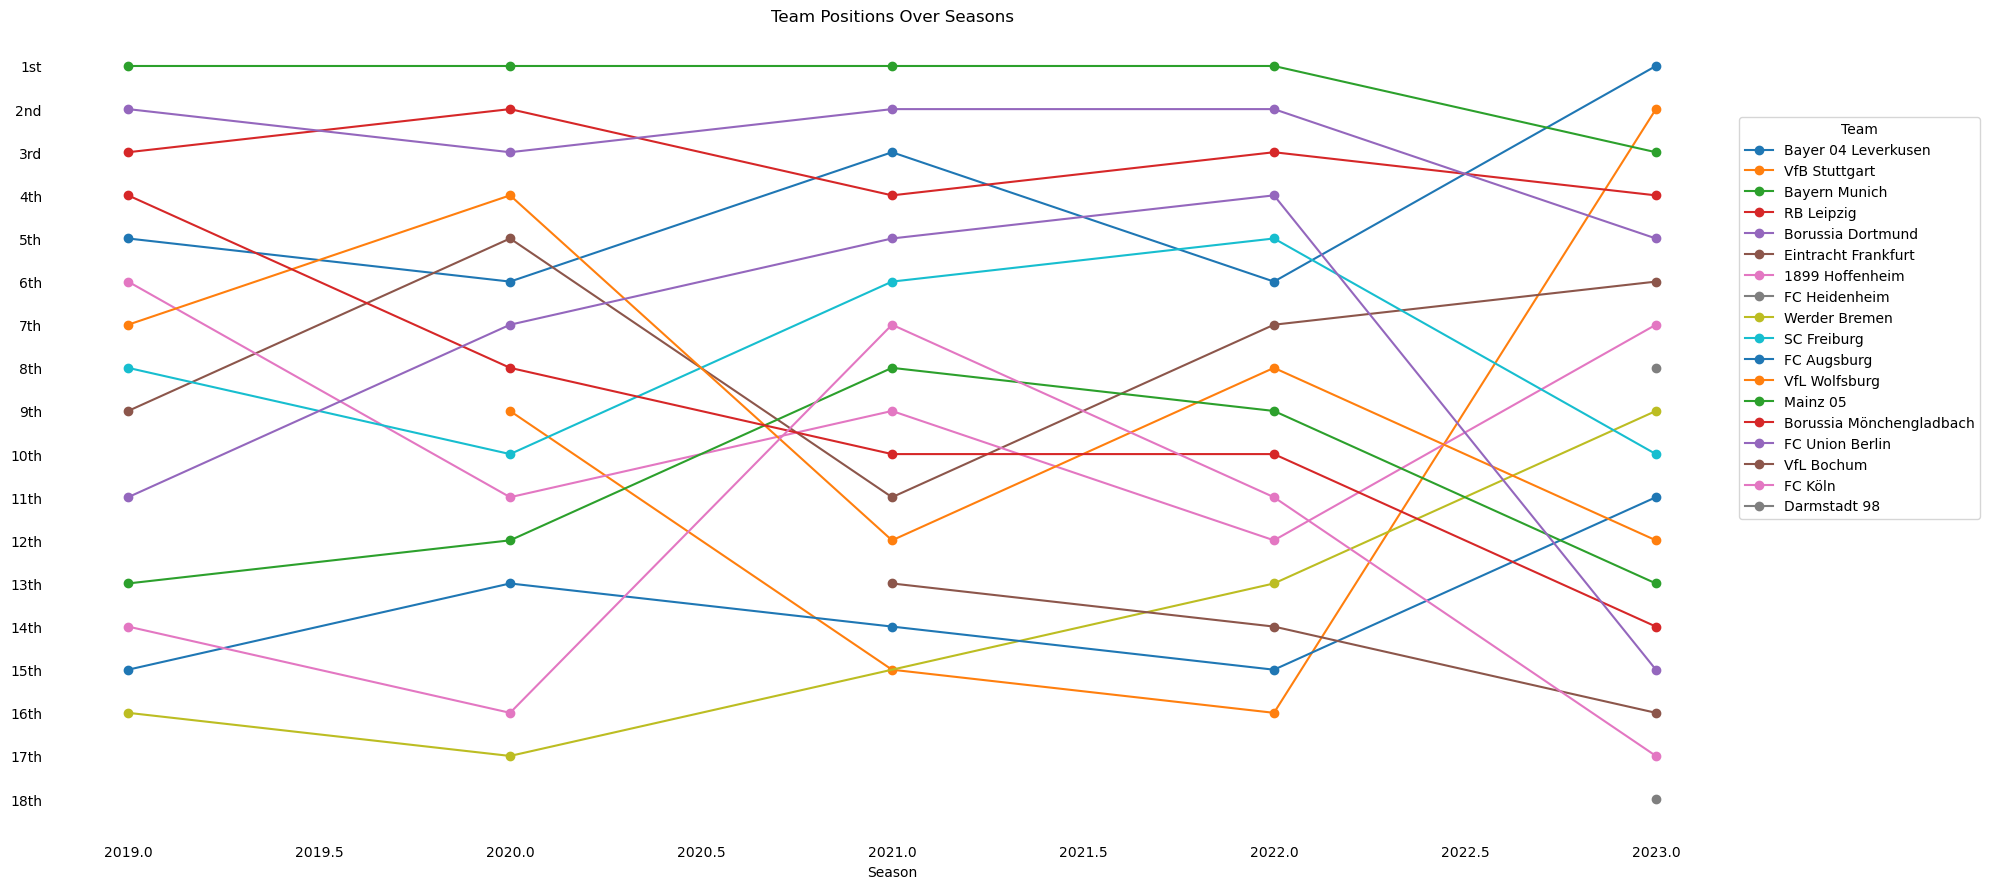

In [308]:
plt.figure(figsize=(20,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    plt.plot(
        team_data['season_id'],
        team_data['final_standing'],
        marker='o',
        label=team
    )
plt.gca().invert_yaxis()


plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

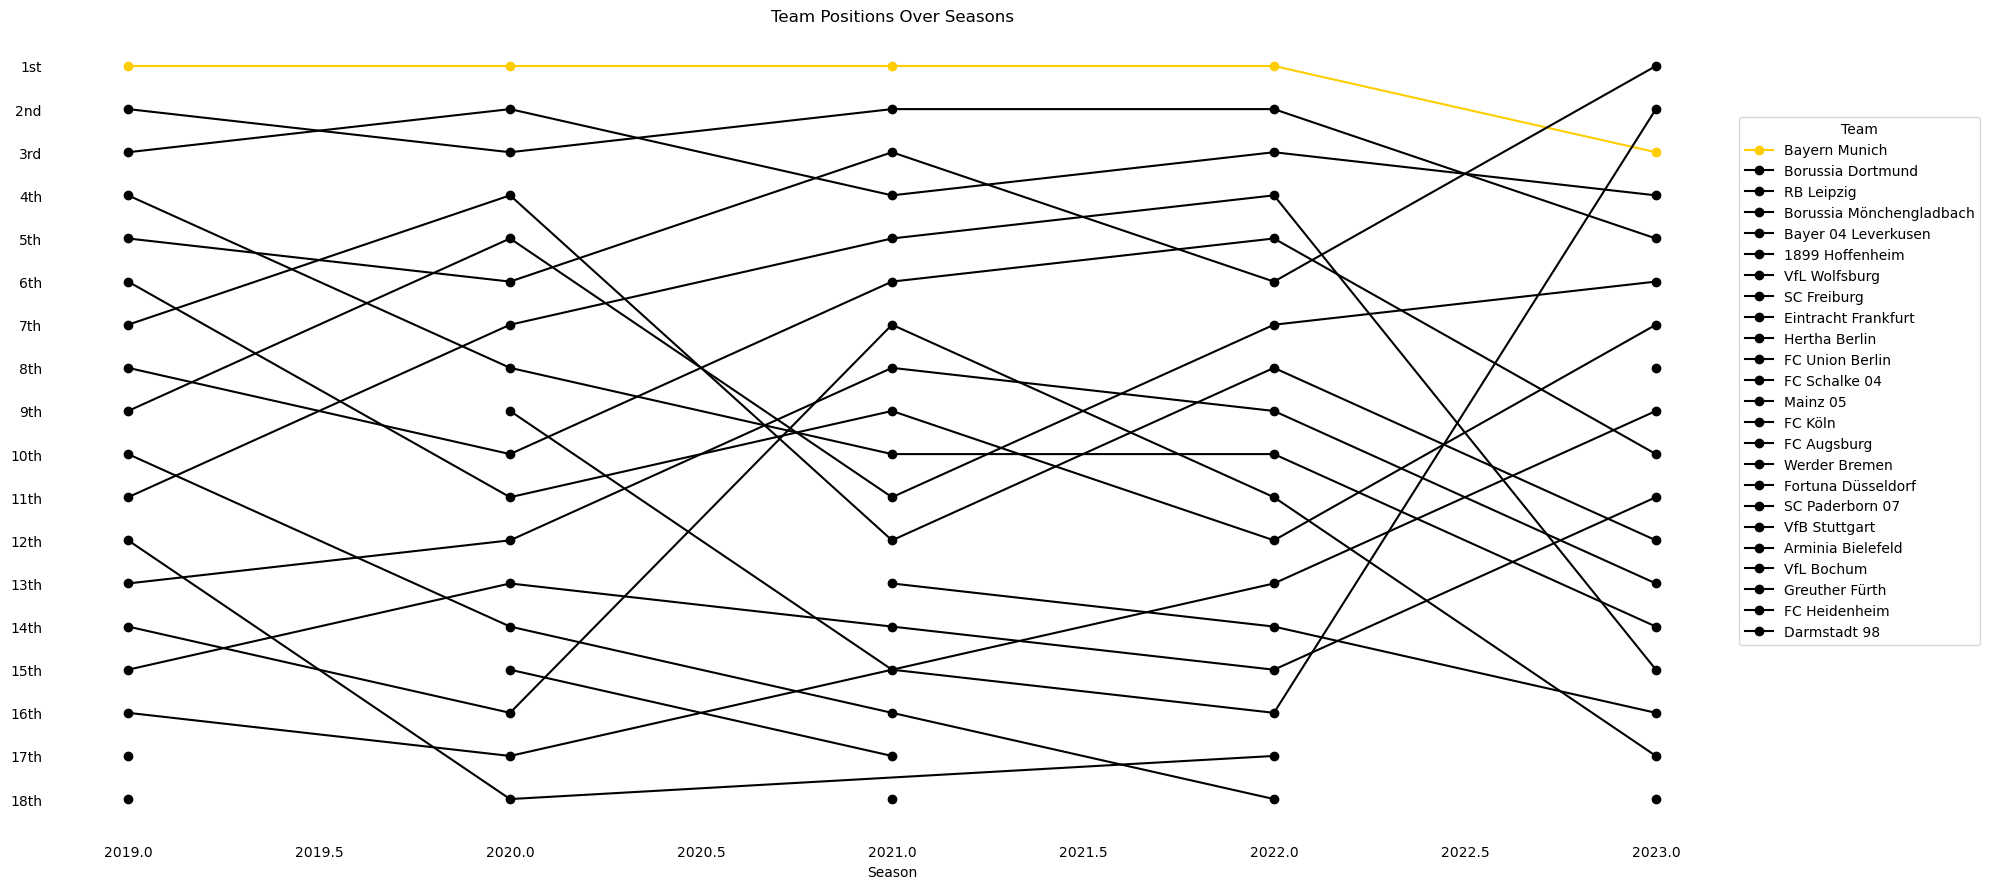

In [291]:
principal_team = 'Bayern Munich'

plt.figure(figsize=(20,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    if team != principal_team:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='black'
        )
    else:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color=redbull_palette[2]
        )
plt.gca().invert_yaxis()


plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

# EDA Transfers

## Load clean file

In [292]:
transfers_df_clean = pd.read_csv(os.path.join(DATA_FOLDER, 'clean_transfers.csv'))
transfers_df_clean.head()

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
0,2518704,2019-07-01,free loan transfer,19/20,2019,314245,Emmanuel Iyoha,21.0,NaN,0.90,...,right,2024-02-25T02:16:17.122733,right-back,left-winger,defense,defense,attack,Germany,Nigeria,NaN
1,2472611,2019-07-01,free transfer,19/20,2019,153634,Marcel Hilßner,24.0,0.0,0.40,...,left,2024-02-24T10:13:57.036699,right-winger,left-winger,mid,attack,attack,Germany,NaN,NaN
2,2512548,2019-07-01,free loan transfer,19/20,2019,195676,Ole Käuper,22.0,NaN,0.35,...,left,2024-02-24T10:13:48.186890,central-midfield,NaN,mid,mid,NaN,Germany,NaN,NaN
3,2507880,2019-07-01,free loan transfer,19/20,2019,236986,Thore Jacobsen,22.0,NaN,0.30,...,left,2024-02-24T10:13:43.016587,central-midfield,left-back,mid,mid,defense,Germany,NaN,NaN
4,2491956,2019-07-01,transfer to no club,19/20,2019,31652,Fabian Schönheim,32.0,NaN,0.20,...,unknown,2024-02-24T23:49:23.092466,left-back,defensive-midfield,defense,defense,mid,Germany,NaN,NaN


In [293]:
transfers_df_clean.columns

Index(['transfer_id', 'transfer_datetime', 'transfer_type', 'season',
       'season_id', 'player_id', 'player_name', 'player_age_at_transfer',
       'transfer_fee_million', 'market_value_million', 'from_club_id',
       'from_club_name', 'from_competition_id', 'from_competition_name',
       'to_club_id', 'to_club_name', 'to_competition_id',
       'to_competition_name', 'date_of_birth_datetime', 'citizenship',
       'position_main', 'position_other', 'height_cm', 'foot', 'updated_at',
       'extra_position_1', 'extra_position_2', 'position_main_segment',
       'extra_position_1_segment', 'extra_position_2_segment', 'citizenship_1',
       'citizenship_2', 'citizenship_3'],
      dtype='object')

In [294]:
transfers_df_clean[transfers_df_clean['to_competition_id']=='L1']['to_club_name'].unique()

array(['SC Paderborn 07', 'FC Augsburg', 'FC Union Berlin', 'FC Köln',
       'Borussia Dortmund', 'Mainz 05', 'Fortuna Düsseldorf',
       'RB Leipzig', 'Bayern Munich', '1899 Hoffenheim', 'VfL Wolfsburg',
       'Borussia Mönchengladbach', 'Werder Bremen', 'Hertha Berlin',
       'FC Schalke 04', 'Bayer 04 Leverkusen', 'SC Freiburg',
       'Eintracht Frankfurt', 'Arminia Bielefeld', 'VfB Stuttgart',
       'VfL Bochum', 'Greuther Fürth', 'FC Heidenheim', 'Darmstadt 98'],
      dtype=object)

In [295]:
transfers_df_clean[transfers_df_clean['from_competition_id']=='L1']['from_club_name'].unique()

array(['Fortuna Düsseldorf', 'Werder Bremen', 'FC Union Berlin',
       'FC Schalke 04', 'SC Paderborn 07', 'FC Augsburg', 'VfL Wolfsburg',
       'Eintracht Frankfurt', 'Hertha Berlin', 'FC Köln',
       '1899 Hoffenheim', 'Bayer 04 Leverkusen', 'SC Freiburg',
       'Mainz 05', 'RB Leipzig', 'Borussia Dortmund',
       'Borussia Mönchengladbach', 'Bayern Munich', 'Arminia Bielefeld',
       'VfB Stuttgart', 'VfL Bochum', 'Greuther Fürth', 'FC Heidenheim',
       'Darmstadt 98'], dtype=object)

# Team spending analysis per season

### Computation

In [420]:
cols = ['team_name', 'season_id', 
        'n_adquisitions', 'n_adquisitions_goalkeeper', 'n_adquisitions_defense', 'n_adquisitions_mid', 'n_adquisitions_attack',
        'n_drops', 'n_drops_goalkeeper', 'n_drops_defense', 'n_drops_mid', 'n_drops_attack',
        'millions_spend', 'millions_received', 'millions_balance']

df_team_transfer_data = pd.DataFrame(columns=cols)

for season in unique_seasons:
    unique_teams = list(standings_df_clean[standings_df_clean['season_id']==season]['team_name'].unique())
    for team in unique_teams:
        n_adquisitions = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season)].shape[0]
        n_adquisitions_goalkeeper = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='goalkeeper')].shape[0]
        n_adquisitions_defense = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='defense')].shape[0]
        n_adquisitions_mid = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='mid')].shape[0]
        n_adquisitions_attack = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='attack')].shape[0]

        n_drops = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season)].shape[0]
        n_drops_goalkeeper = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='goalkeeper')].shape[0]
        n_drops_defense = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='defense')].shape[0]
        n_drops_mid = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='mid')].shape[0]
        n_drops_attack = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='attack')].shape[0]

        millions_spend = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season)]['transfer_fee_million'].sum()
        millions_received = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season)]['transfer_fee_million'].sum()
        milions_balance = millions_received - millions_spend

        df_team_transfer_data.loc[len(df_team_transfer_data)] = [
            team, season, 
            n_adquisitions, n_adquisitions_goalkeeper, n_adquisitions_defense, n_adquisitions_mid, n_adquisitions_attack, 
            n_drops, n_drops_goalkeeper, n_drops_defense, n_drops_mid, n_drops_attack, 
            millions_spend, millions_received, milions_balance
            ]

In [421]:
df_team_transfer_data

,team_name,season_id,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance
0,Bayern Munich,2019,10,0,4,5,1,10,0,4,4,2,139.50,54.000,-85.500
1,Borussia Dortmund,2019,16,1,6,5,4,16,0,7,4,5,148.50,132.250,-16.250
2,RB Leipzig,2019,16,1,4,5,6,14,2,3,4,5,93.00,45.250,-47.750
3,Borussia Mönchengladbach,2019,9,1,5,0,3,9,1,4,1,3,40.50,34.100,-6.400
4,Bayer 04 Leverkusen,2019,10,0,4,4,2,9,2,3,3,1,98.20,33.500,-64.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Borussia Mönchengladbach,2023,13,1,3,2,7,13,1,3,4,5,29.28,25.000,-4.280
86,FC Union Berlin,2023,32,5,5,10,12,29,2,6,9,12,38.75,7.100,-31.650
87,VfL Bochum,2023,16,3,6,4,3,15,1,6,1,7,2.45,0.000,-2.450
88,FC Köln,2023,18,3,7,2,6,17,2,6,3,6,2.50,2.700,0.200


### General spending per season

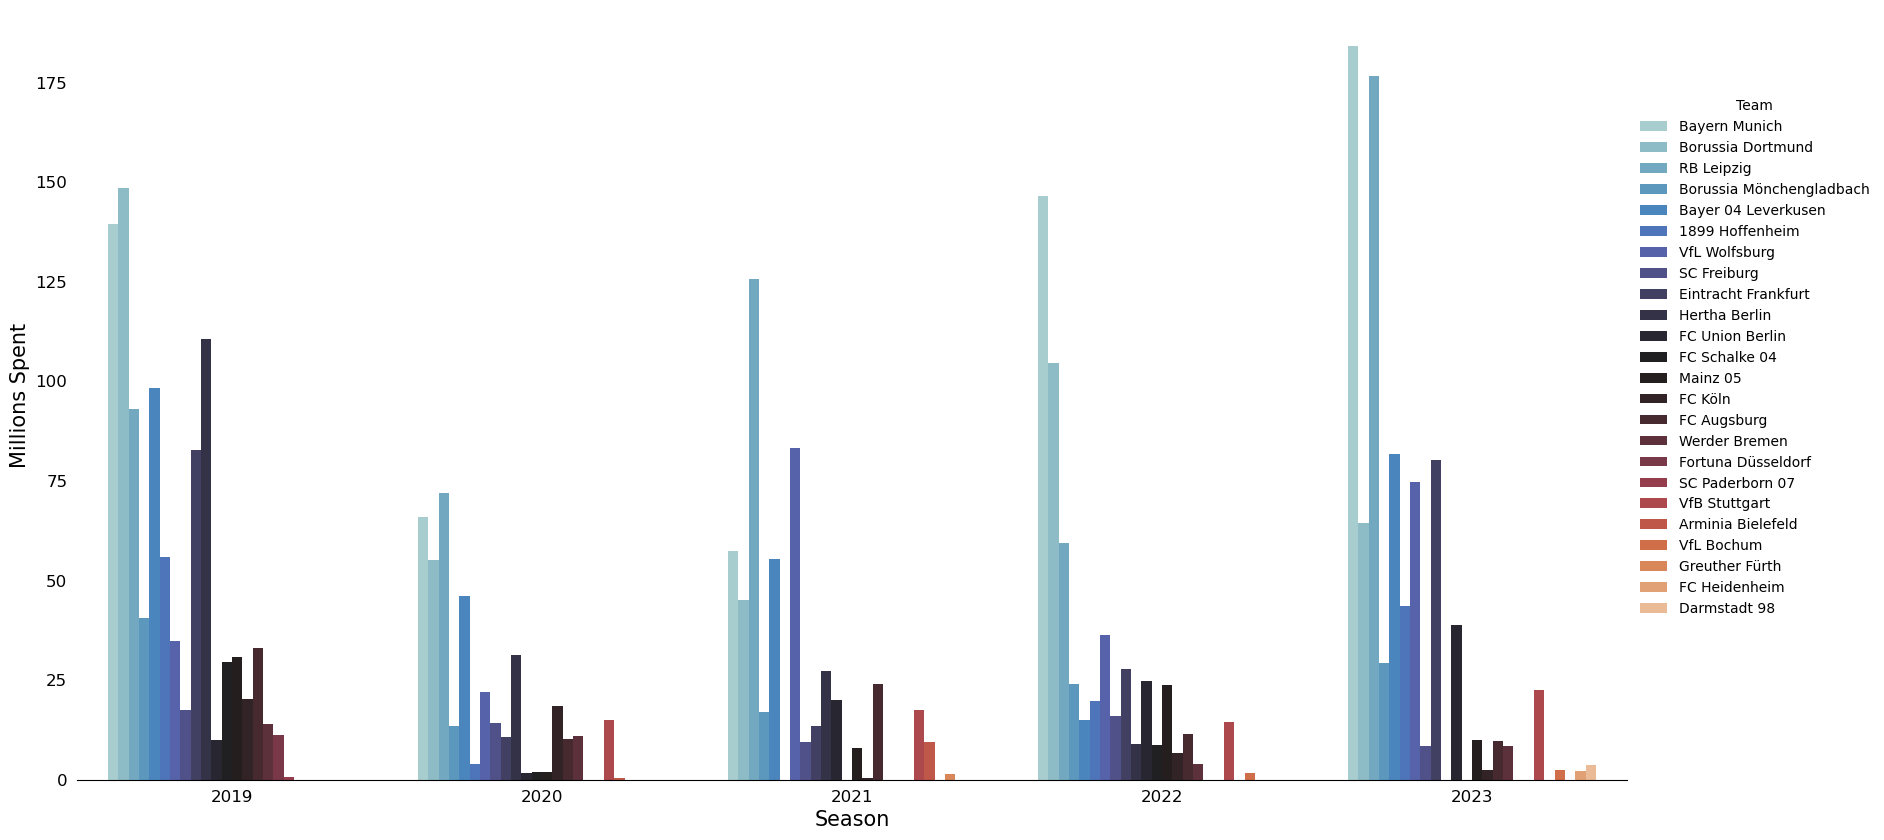

In [423]:
plt.figure(figsize=(20,10))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=df_team_transfer_data,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9), frameon=False)
plt.show()

### Top 5 that most spend per season

In [439]:
dfs = {}
for season in unique_seasons:
    dfs[season]= df_team_transfer_data[df_team_transfer_data['season_id']==season].sort_values(by=['millions_spend'], ascending=False).head(5)
dfs[season]
df_top_5_spenders = pd.concat(dfs, ignore_index=True)
df_top_5_spenders

,team_name,season_id,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance
0,Borussia Dortmund,2019,16,1,6,5,4,16,0,7,4,5,148.50,132.250,-16.250
1,Bayern Munich,2019,10,0,4,5,1,10,0,4,4,2,139.50,54.000,-85.500
2,Hertha Berlin,2019,16,1,2,8,5,16,2,2,9,3,110.70,23.445,-87.255
3,Bayer 04 Leverkusen,2019,10,0,4,4,2,9,2,3,3,1,98.20,33.500,-64.700
4,RB Leipzig,2019,16,1,4,5,6,14,2,3,4,5,93.00,45.250,-47.750
5,RB Leipzig,2020,13,2,2,3,6,14,2,4,2,6,72.00,77.500,5.500
6,Bayern Munich,2020,17,2,5,5,5,11,2,2,4,3,66.00,22.250,-43.750
7,Borussia Dortmund,2020,12,0,5,5,2,8,1,3,3,1,55.15,5.500,-49.650
8,Bayer 04 Leverkusen,2020,12,1,4,3,4,8,1,2,3,2,46.20,91.000,44.800
9,Hertha Berlin,2020,16,1,4,4,7,18,2,2,6,8,31.25,10.450,-20.800


### Best and worst standing 5

In [425]:
df_team_transfer_data_best_consistent_5 = df_team_transfer_data[df_team_transfer_data['team_name'].isin(best_consistent_5)]
df_team_transfer_data_worst_consistent_5 = df_team_transfer_data[df_team_transfer_data['team_name'].isin(worst_consistent_5)]

In [426]:
df_team_transfer_data_best_consistent_5.head()

,team_name,season_id,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance
0,Bayern Munich,2019,10,0,4,5,1,10,0,4,4,2,139.50,54.00,-85.50
1,Borussia Dortmund,2019,16,1,6,5,4,16,0,7,4,5,148.50,132.25,-16.25
2,RB Leipzig,2019,16,1,4,5,6,14,2,3,4,5,93.00,45.25,-47.75
4,Bayer 04 Leverkusen,2019,10,0,4,4,2,9,2,3,3,1,98.20,33.50,-64.70
10,FC Union Berlin,2019,24,4,4,10,6,16,2,6,7,1,10.05,1.25,-8.80


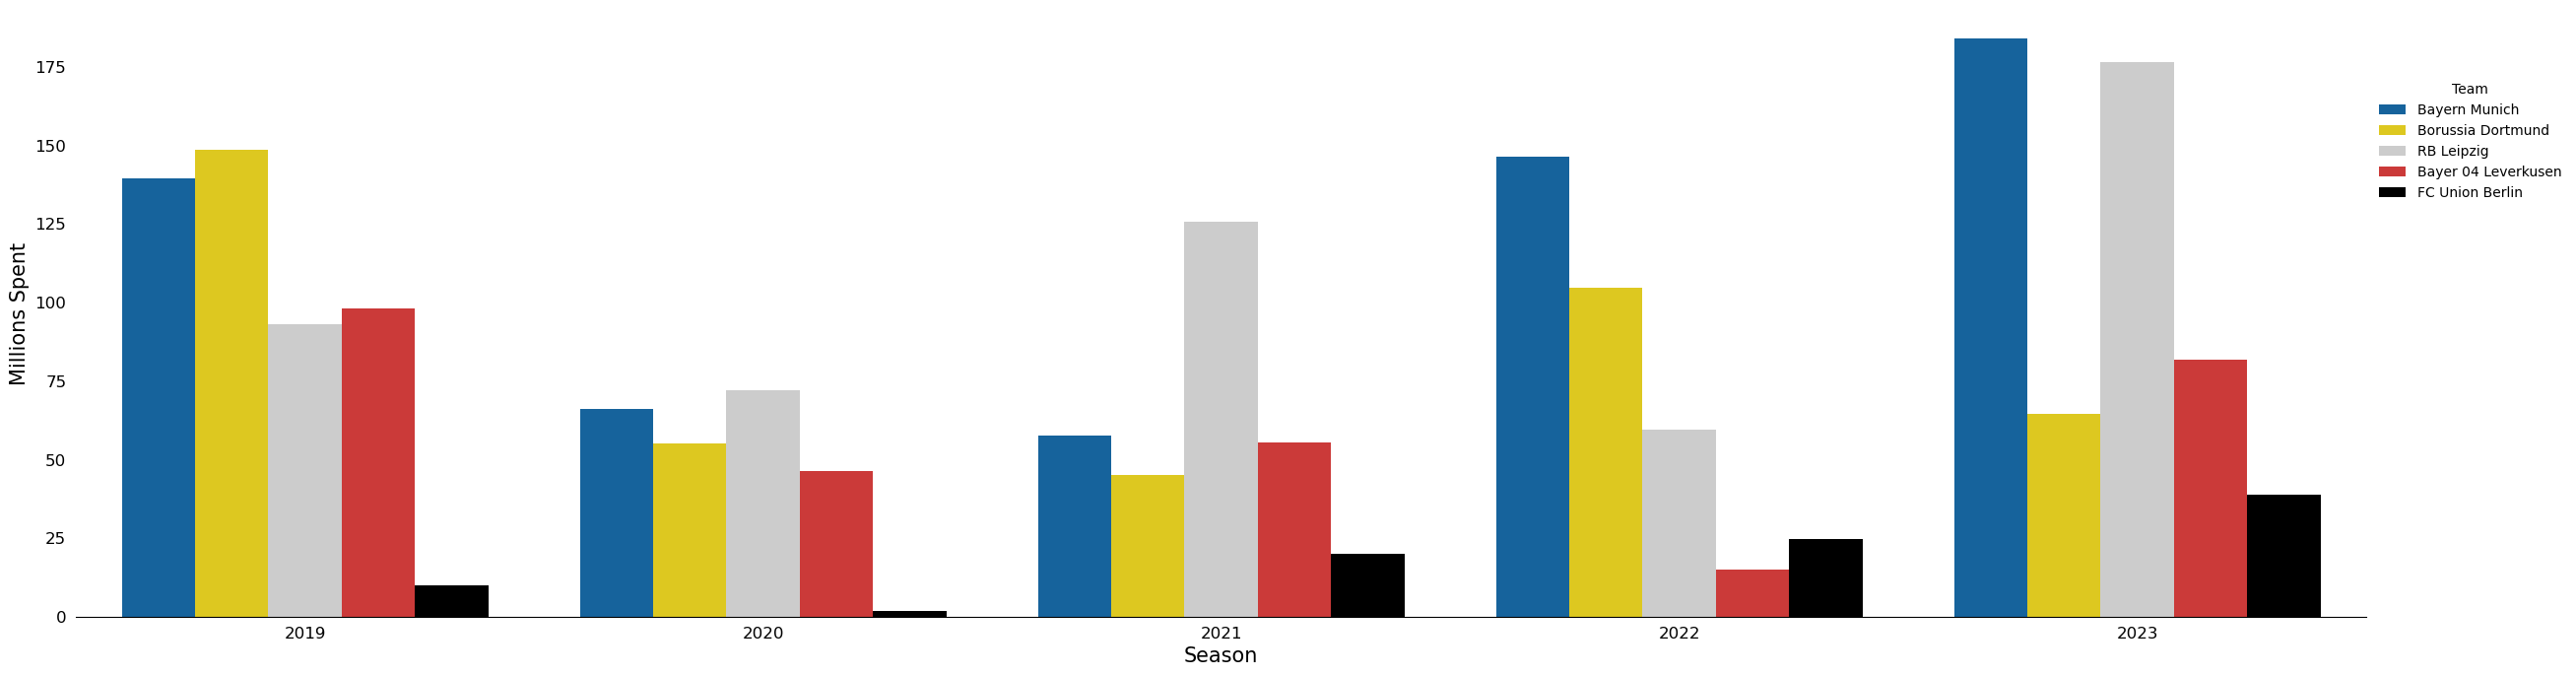

In [485]:
plt.figure(figsize=(30,8))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=top_5_palette
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9), frameon=False)
plt.show()

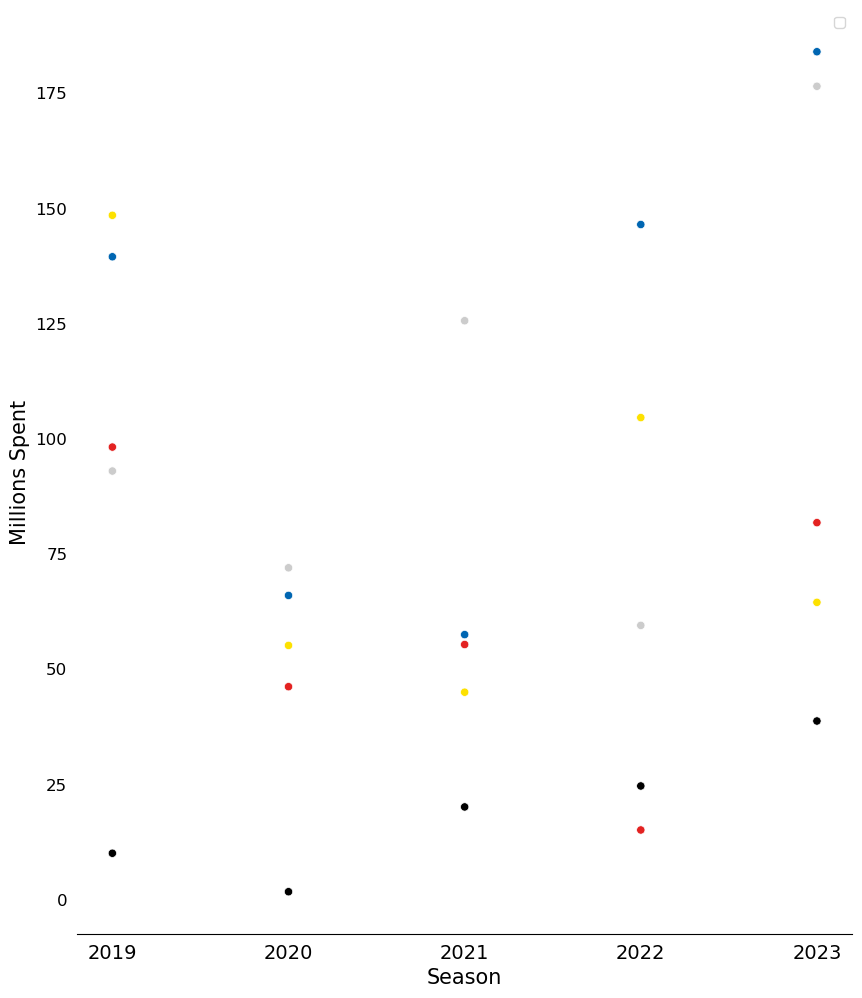

In [507]:
plt.figure(figsize=(10,12))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

sns.scatterplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=top_5_palette
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([2019, 2020, 2021, 2022, 2023], fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=14)
plt.legend([])

plt.show()

In [510]:
top_5_palette

['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

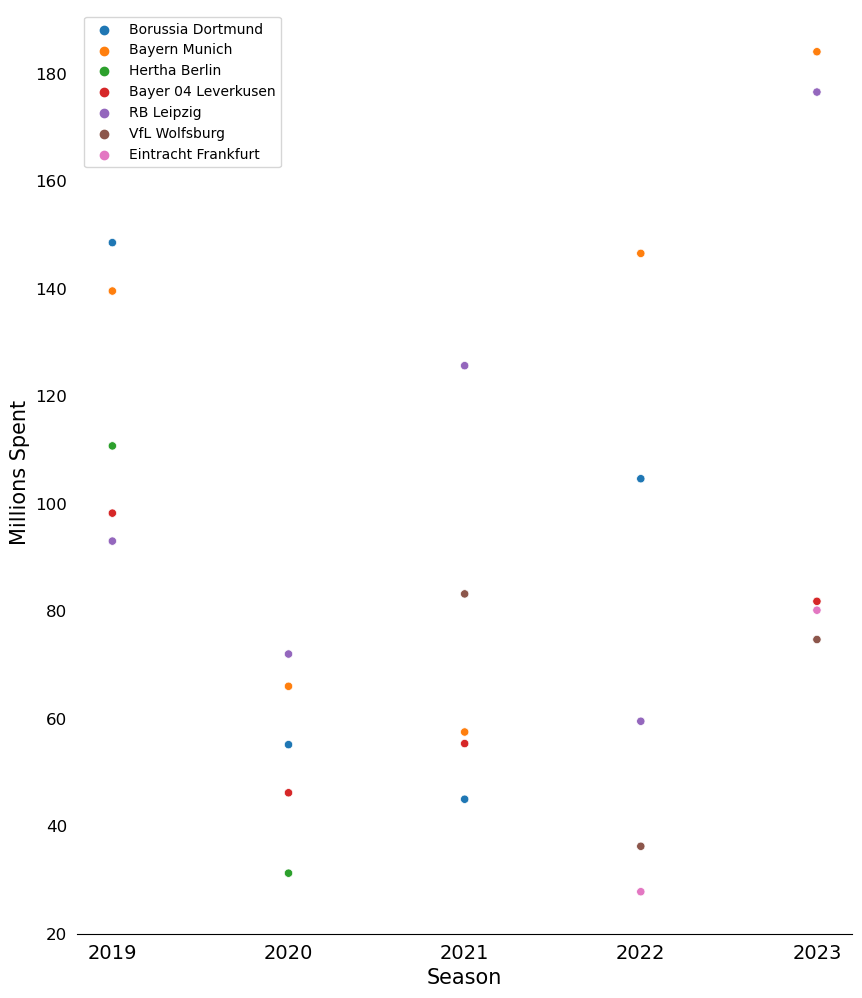

In [512]:
plt.figure(figsize=(10,12))

# Define custom colors for each category
custom_colors = {
    'Bayern Munich': '#0066B2', 
    'Borussia Dortmund': '#FDE100', 
    'RB Leipzig': '#CCCCCC', 
    'Bayer 04 Leverkusen': '#E32221',
    'Hertha Berlin': '#004D9E',
    'FC Union Berlin': '#000000',
    'VfL Wolfsburg': '#008000'
    }

# Create a list of colors for each bar based on the category
#top_5_palette = [custom_colors[cat] for cat in df_top_5_spenders['team_name']]

sns.scatterplot(
    data=df_top_5_spenders,
    x='season_id',
    y='millions_spend',
    hue='team_name'
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([2019, 2020, 2021, 2022, 2023], fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=14)
plt.legend()

plt.show()

Text(0.5, 0, '')

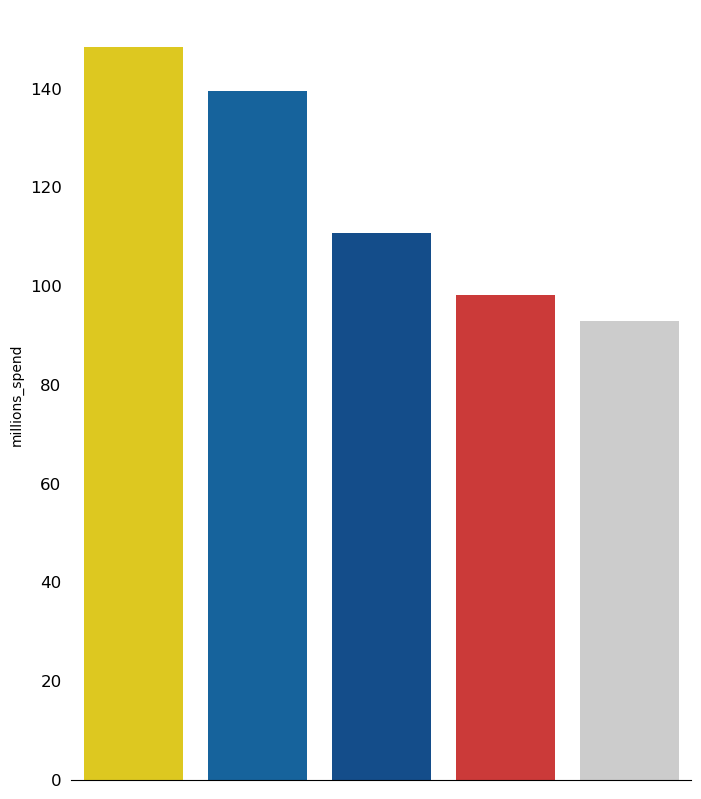

In [484]:
plt.figure(figsize=(8,10))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

# Define custom colors for each category
custom_colors = {
    'Bayern Munich': '#0066B2', 
    'Borussia Dortmund': '#FDE100', 
    'RB Leipzig': '#CCCCCC', 
    'Bayer 04 Leverkusen': '#E32221',
    'Hertha Berlin': '#004D9E'
    }

# Create a list of colors for each bar based on the category
bar_colors = [custom_colors[cat] for cat in df_top_5_spenders[df_top_5_spenders['season_id']==2019]['team_name']]

sns.barplot(
    data=df_top_5_spenders[df_top_5_spenders['season_id']==2019],
    x='team_name',
    y='millions_spend',
    palette=bar_colors
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([])
plt.xlabel('')

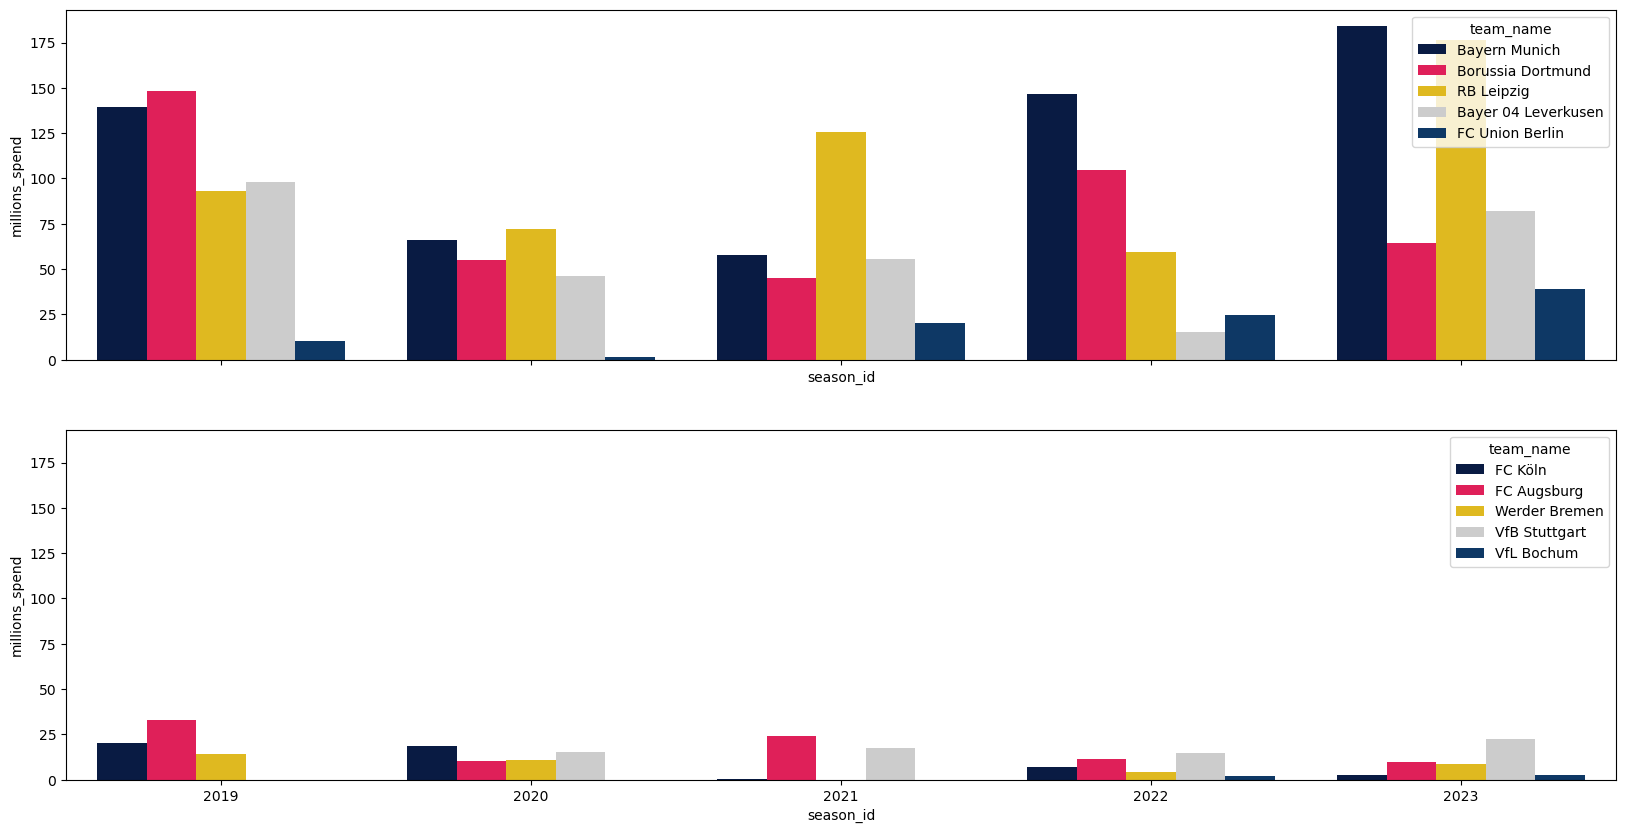

In [428]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season',
    y='millions_spend',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()

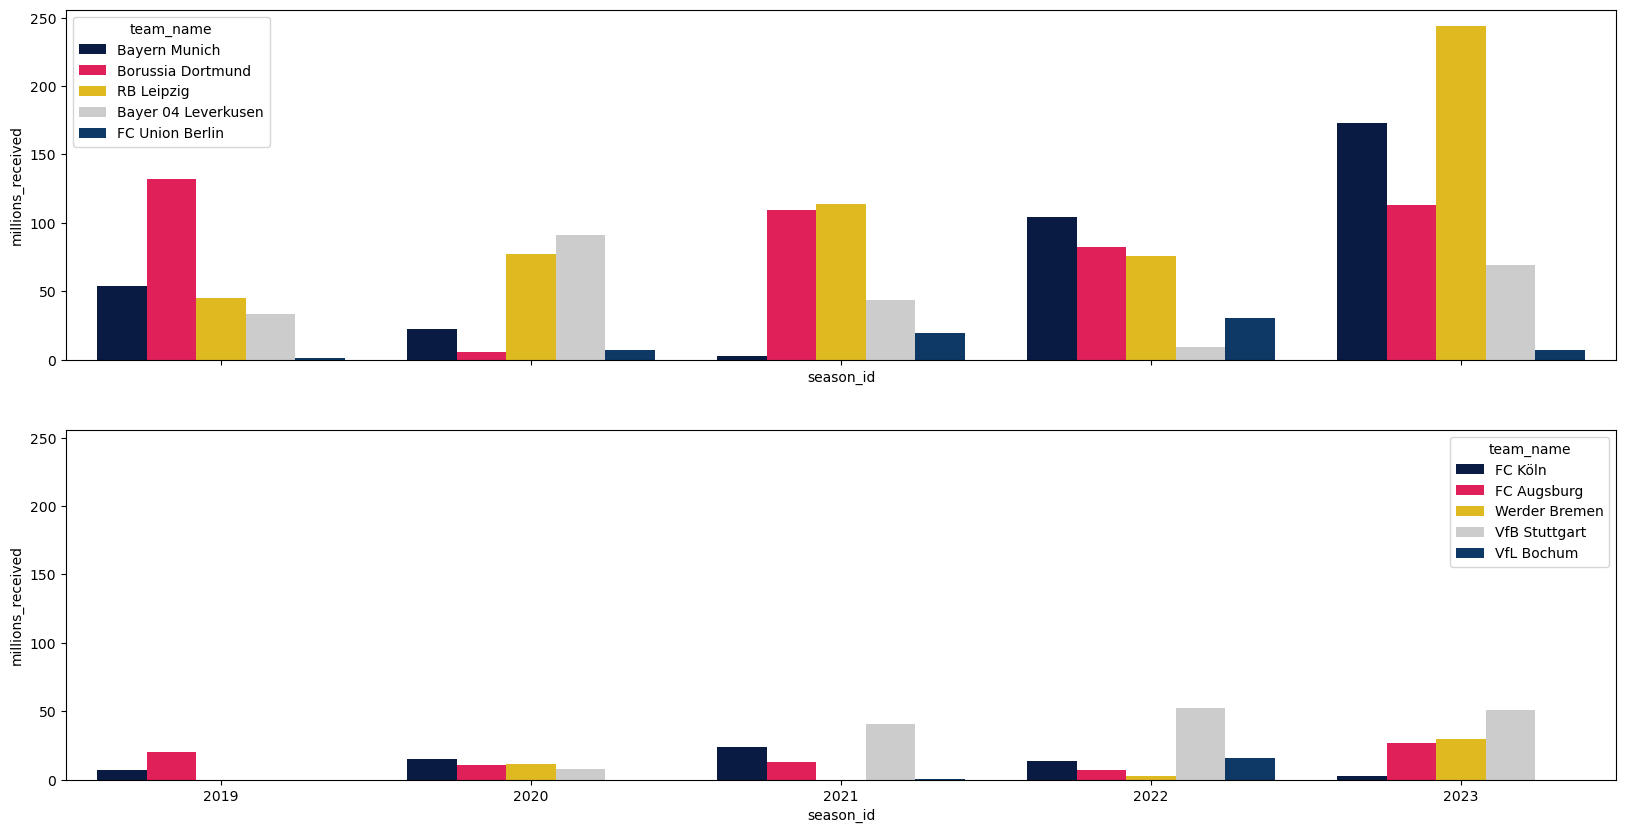

In [429]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_received',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season_id',
    y='millions_received',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()

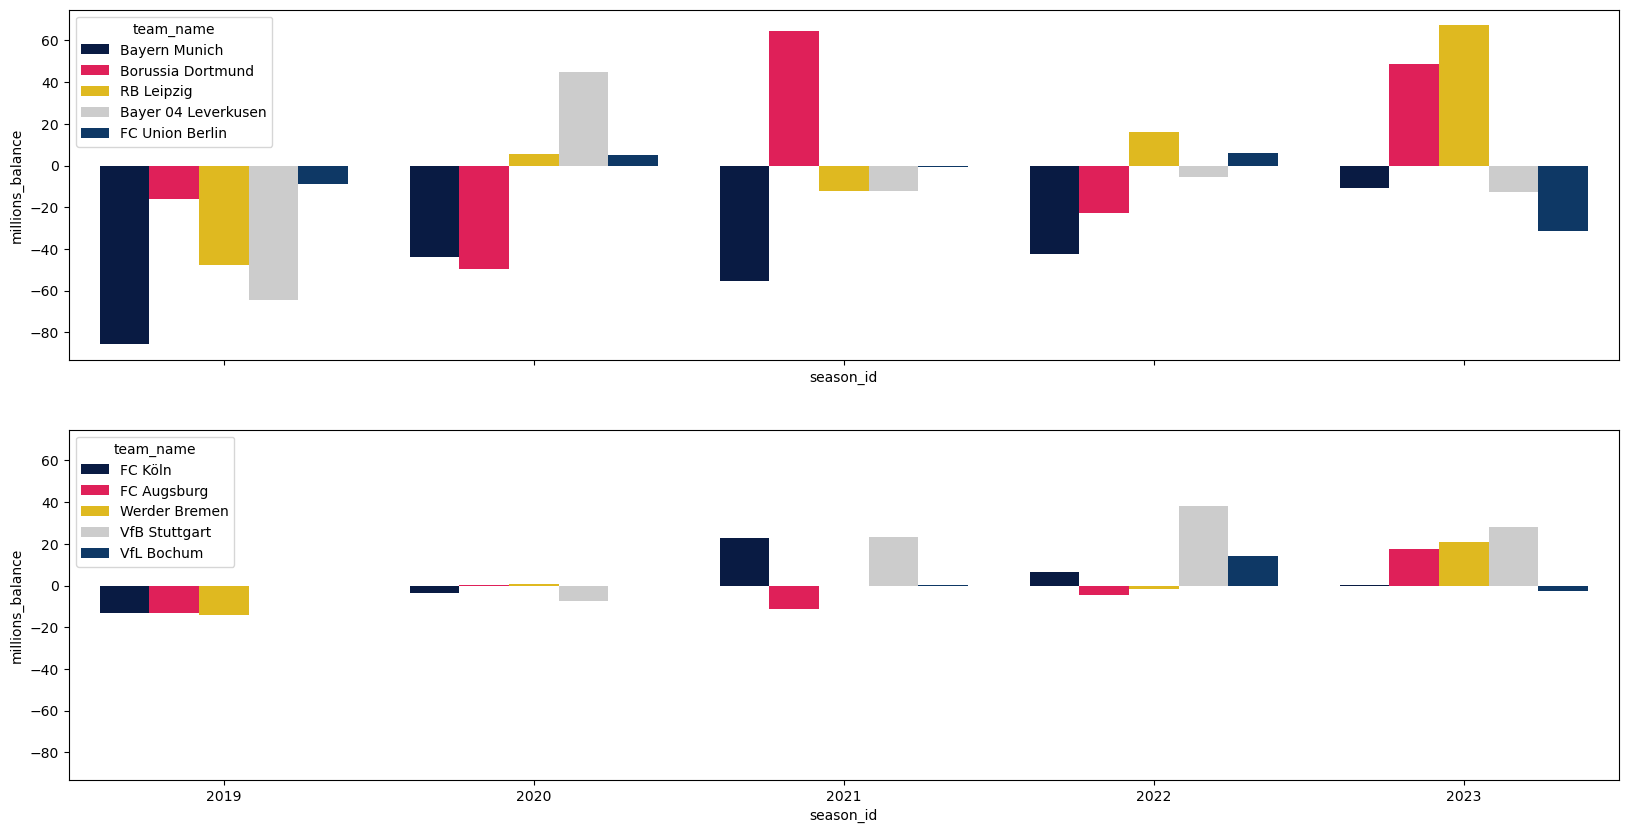

In [430]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_balance',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season_id',
    y='millions_balance',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()